# Random Dataset Generation
----------------------------------------------------------------

In [7]:
import os
import numpy as np
import random
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
print("Libraries imported")

# import configuration file
from omegaconf import OmegaConf
conf = OmegaConf.load(r'E:/ppmi/exp1/config/config py.yaml')
print("Config file loaded")

Libraries imported
Config file loaded


In [2]:
n_samples    = 500
rng          = np.random.default_rng(seed=12345)
no_structure = pd.DataFrame(rng.integers(conf.randomData.rng[0], 
                                         conf.randomData.rng[1],
                                         size=(n_samples, 4)),
                            columns=list('ABCD'))

no_structure.head()

,A,B,C,D
0,69,22,78,31
1,20,79,64,67
2,98,39,83,33
3,56,59,21,18
4,22,67,61,94


## Fit PCA on scaled random data

In [3]:
pca = PCA(n_components=2)
scaler = StandardScaler()
scaled_no_structure = scaler.fit_transform(no_structure)
pca_object = pca.fit_transform(scaled_no_structure)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.26963676 0.25014936]
[23.22226354 22.36735822]


In [4]:
finalDf = pd.DataFrame(data = pca_object,
             columns = ['principal component 1',
                        'principal component 2'])
finalDf.head()

,principal component 1,principal component 2
0,-0.790489,-0.136911
1,0.379815,-0.374421
2,-1.174086,-1.148531
3,1.180371,-0.230864
4,-0.348127,0.147593


## Visualize PCA

Text(0, 0.5, 'Dimension 2 (25.0%)')

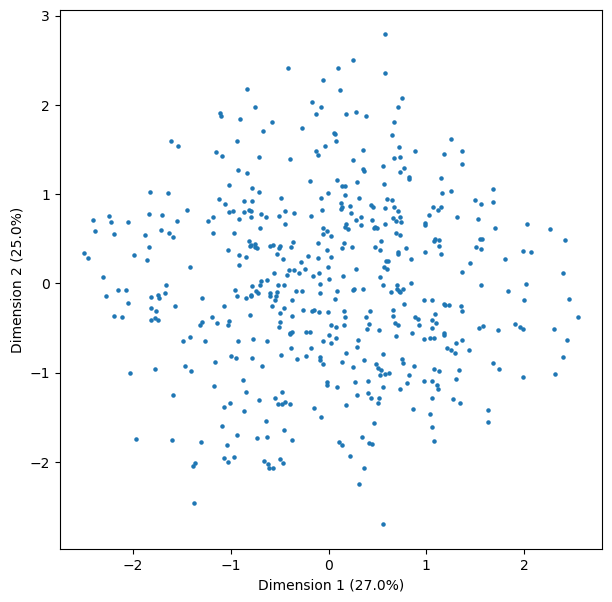

In [5]:
plt.figure(figsize=(7,7))
plt.scatter(finalDf['principal component 1'],
            finalDf['principal component 2'],
            s=5)
plt.xlabel('Dimension 1' + " (" + str(np.round(pca.explained_variance_ratio_[0],2)*100) + "%"")")
plt.ylabel('Dimension 2' + " (" + str(np.round(pca.explained_variance_ratio_[1],2)*100) + "%"")")

## Export the random dataframe

In [8]:
no_structure.to_csv(conf.randomData.randomDataPath, sep = ",", index = False, encoding="UTF-8")
finalDf.to_csv(conf.randomData.pcaPath, sep = ",", index = False, encoding="UTF-8")

print('Data exported')

Data exported
